# PS8

Tyler Amos

MACSS 30100

March 12 2018

# (a)

In [1]:
import pandas as pd
from itertools import product
import matplotlib.pyplot as plt
import altair as alt
%matplotlib inline
from sklearn.model_selection import LeaveOneOut, KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import numpy as np
from sklearn.svm import SVC
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np
import random
random.seed(22)
from sklearn.neural_network import MLPClassifier
import warnings
warnings.filterwarnings("ignore")
df = pd.read_csv('https://raw.githubusercontent.com/UC-MACSS/persp-model_W18/master/ProblemSets/PS8/data/strongdrink.txt')
                 
                 

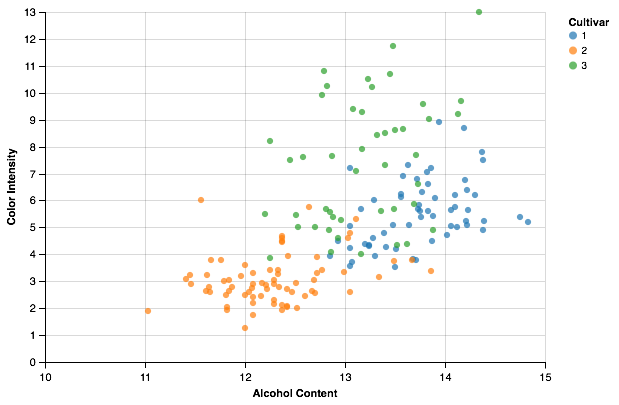

In [2]:
# you may need to install altair: https://altair-viz.github.io/installation.html

# and run the command below in the terminal to reproduce this plot

#jupyter nbextension enable vega --py --sys-prefix

df_plot = df.copy()

df_plot['Cultivar'] = df['cultivar'].astype('category')

alt.Chart(title = 'C', data = df_plot).mark_circle().encode(
    x=alt.X('alco', axis=alt.Axis( title='Alcohol Content'),
            scale=alt.Scale(domain=(10, 15))),
    y=alt.Y('color_int', axis=alt.Axis(title='Color Intensity')),
    color = 'Cultivar')

# (b)

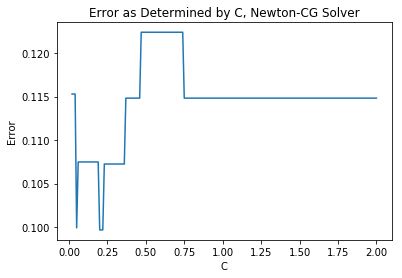

In [3]:
df_b = df.copy()
df_b = df_b[df_b['cultivar'] != 3]
x_data = df_b[['alco', 'malic', 'tot_phen', 'color_int']]
x_data['constant'] = 1 # Add constant
x_data = x_data.values
y_data = np.ravel(df_b['cultivar'])
kf = KFold(n_splits = 4, shuffle = True, random_state = 22)

def task_b(solver, C_val, penalty_val):
    
    MSE_vec_kf = []
    for train_id, test_id in kf.split(x_data):
        x_train, x_test = x_data[train_id], x_data[test_id]
        y_train, y_test = y_data[train_id], y_data[test_id]
        multi_log = LogisticRegression(multi_class = 'multinomial',
                                       solver = solver, C = C_val, penalty = penalty_val)
        multi_log.fit(x_train, y_train)
        y_pred = multi_log.predict(x_test)
        errors = y_pred != y_test
        MSE_vec_kf.append(np.mean(errors))
    return MSE_vec_kf
'''    print("SOLVER: {}, C: {}, PENALTY {}, \n MSE {}\n".format(solver, C_val,
                                                            penalty_val, 
                                                            np.mean(MSE_vec_kf)
                                                          ))'''
results = []
c_list = []
for i in range(1, 200, 1):
    c = (i + 1)/ 100
    results.append(np.mean(task_b('newton-cg', c, 'l2')))
    c_list.append(c)


plt.plot(c_list, results)
plt.ylabel("Error")
plt.xlabel("C")
plt.title("Error as Determined by C, Newton-CG Solver");


It appears the best results come from Newton-CG, with C close to 0.2.
One such set of parameters - C: 0.03 - results in MSE: 0.11482007575757576


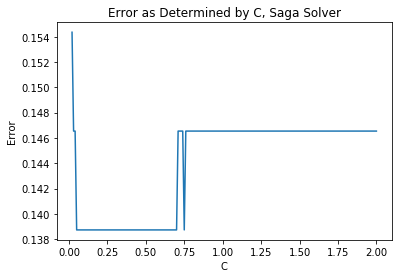

In [4]:
results = []
c_list = []
for i in range(1, 200, 1):
    c = (i + 1)/ 100
    results.append(np.mean(task_b('saga', c, 'l2')))
    c_list.append(c)


plt.plot(c_list, results)
plt.ylabel("Error")
plt.xlabel("C")
plt.title("Error as Determined by C, Saga Solver");


print("It appears the best results come from Newton-CG, with C close to 0.2.\nOne such set of parameters - C: {} - results in MSE: {}".format((2 + 1)/ 100, np.mean(task_b('newton-cg', c, 'l2'))))



# (c)

In [5]:
df_c = df.copy()
x_data = df_c[['alco', 'malic', 'tot_phen', 'color_int']]
y_data = df_c['cultivar'].astype('category')

def rforclass(d,e,m):

    clf = RandomForestClassifier(random_state = 22,
                             bootstrap = True,
                            oob_score = True,
                             max_depth = d,
                             n_estimators = e,
                             min_samples_leaf = m)

    clf.fit(x_data, y_data)
    error = 1 - clf.oob_score_
    return error

d_range = np.arange(1, 10,1)
e_range = np.arange(20,50,1)
m_range = np.arange(1, 5, 1)


combos = product(d_range, e_range, m_range)

results = []
d_list = []
e_list = []
m_list = []

for d, e, m in combos:
    d_list.append(d)
    e_list.append(e)
    m_list.append(m)
    results.append(rforclass(d,e,m))
    



There doesn't seem to be any improvement in errors past depth = 5. So let us set that parameter at 5.


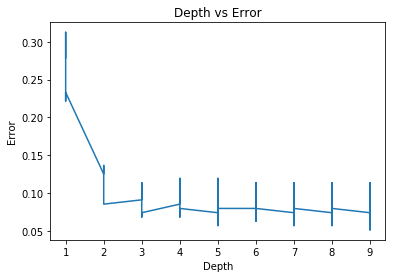

In [6]:


def three_d_plot(e_list, m_list, results):
    # From: https://matplotlib.org/mpl_toolkits/mplot3d/tutorial.html
    # https://stackoverflow.com/questions/8722735/i-want-to-use-matplotlib-to-make-a-3d-plot-given-a-z-function#8723033
    fig = plt.figure()
    ax = fig.gca(projection='3d')

    # Make data.
    X, Y = np.meshgrid(np.array(e_list), np.array(m_list))
    Z = np.array([results])

    # Plot the surface.
    ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                           linewidth=0, antialiased=False)
    ax.set_xlabel('No. Estimators')
    ax.set_ylabel('Min Samples Leaf')
    ax.set_zlabel('Error')
    ax.view_init(50, 45)
    

    plt.show()
    
print("There doesn't seem to be any improvement in errors past depth = 5. So let us set that parameter at 5.")
plt.plot(d_list, results)
plt.ylabel("Error")
plt.xlabel("Depth")
plt.title("Depth vs Error")
plt.show()

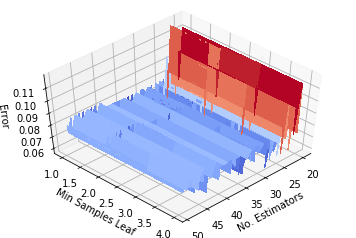


The lowest error appears to be when Min Samples Leaf is between 2 and 3.5 and No. Estimators is between 25 and 35. 

One such set of parameters - Depth: 5, No. Estimators: 30 Min. Samples per Leaf: 3 - results in MSE: 0.07386363636363635


In [7]:
# using d = 5
e_range = np.arange(20,50,1)
m_range = np.arange(1, 5, 1)

from itertools import product

combos = product([5], e_range, m_range)

results = []
e_list = []
m_list = []

for d, e, m in combos:
    e_list.append(e)
    m_list.append(m)
    results.append(rforclass(d,e,m))
    
three_d_plot(e_list, m_list, results)

print("\nThe lowest error appears to be when Min Samples Leaf is between 2 and 3.5 and No. Estimators is between 25 and 35. ")

print("\nOne such set of parameters - Depth: {}, No. Estimators: {} Min. Samples per Leaf: {} - results in MSE: {}".format(5, 30, 3, rforclass(5,30,3)))

# (d)


The lowest error appears to be when Gamma is in [0,0.4] and C is in [0.2, 1]

One such set of parameters - Gamma: 0.2, C: 0.5 - results in MSE: 0.09090909090909091


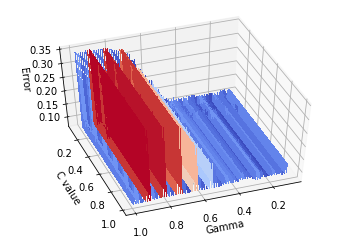

In [8]:
df_d = df.copy()
x_data = df_d[['alco', 'malic', 'tot_phen', 'color_int']]
x_data = x_data.values
y_data = np.ravel(df_d['cultivar'])


kf = KFold(n_splits = 4, shuffle = True, random_state = 22)

def task_d(gamma, C_val):
    MSE_vec_kf = []
    for train_id, test_id in kf.split(x_data):
        x_train, x_test = x_data[train_id], x_data[test_id]
        y_train, y_test = y_data[train_id], y_data[test_id]
        svec = SVC(kernel = 'rbf', gamma = gamma, C = C_val)
        svec.fit(x_train, y_train)
        y_pred = svec.predict(x_test)
        MSE_vec_kf.append(np.mean((y_pred != y_test)**2))
    return np.mean(MSE_vec_kf)

def three_d_plot(e_list, m_list, results):
    # From: https://matplotlib.org/mpl_toolkits/mplot3d/tutorial.html
    # https://stackoverflow.com/questions/8722735/i-want-to-use-matplotlib-to-make-a-3d-plot-given-a-z-function#8723033
    fig = plt.figure()
    ax = fig.gca(projection='3d')

    # Make data.
    X, Y = np.meshgrid(np.array(e_list), np.array(m_list))
    Z = np.array([results])

    # Plot the surface.
    ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                           linewidth=0, antialiased=False)
    ax.set_xlabel('Gamma')
    ax.set_ylabel('C value')
    ax.set_zlabel('Error')
    ax.view_init(50, 70)

combos = list(product(np.arange(.1,1,.01), np.arange(.1, 1, .01)))

results = []
g_list = []
c_list = []
for g, c in combos:
    g_list.append(g)
    c_list.append(c)
    results.append(task_d(g,c))
    
three_d_plot(g_list, c_list, results)

print("\nThe lowest error appears to be when Gamma is in [0,0.4] and C is in [0.2, 1]")

print("\nOne such set of parameters - Gamma: {}, C: {} - results in MSE: {}".format(0.2, 0.5, task_d(0.2,0.5)))


# (e)

In [52]:
df_e = df.copy()
x_data = df_e[['alco', 'malic', 'tot_phen', 'color_int']]
x_data = x_data.values
y_data = np.ravel(df_e['cultivar'])

kf = KFold(n_splits = 4, shuffle = True, random_state = 22)

def task_e(act, layer_size, alph):
    results = []
    for train_id, test_id in kf.split(x_data):
        x_train, x_test = x_data[train_id], x_data[test_id]
        y_train, y_test = y_data[train_id], y_data[test_id]
        nn = MLPClassifier(hidden_layer_sizes = (layer_size,),
                           activation = act,
                           alpha = alph )
        nn.fit(x_train, y_train)
        accuracy = nn.score(x_test, y_test)
        results.append((1 - accuracy)**2)
    return np.mean(results)
 

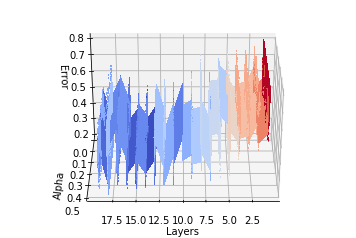

In [10]:

########################################################################
##### This and the three cells which follow take some time to run  #####
########################################################################



def three_d_plot(e_list, m_list, results):
    # From: https://matplotlib.org/mpl_toolkits/mplot3d/tutorial.html
    # https://stackoverflow.com/questions/8722735/i-want-to-use-matplotlib-to-make-a-3d-plot-given-a-z-function#8723033
    fig = plt.figure()
    ax = fig.gca(projection='3d')

    # Make data.
    X, Y = np.meshgrid(np.array(e_list), np.array(m_list))
    Z = np.array([results])

    # Plot the surface.
    ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                           linewidth=0, antialiased=False)
    ax.set_xlabel('Layers')
    ax.set_ylabel('Alpha')
    ax.set_zlabel('Error')
    ax.view_init(30, 90)
    

def task_e_all_together(a_val):
    alpha_list = []
    layer_list = []
    result_list = []

    combos = product(np.arange(1, 20,1), [a_val],
                                np.arange(0.001, .5, 0.01))
    for l, a, alph in combos:
        result_list.append(task_e(a, l, alph))
        alpha_list.append(alph)
        layer_list.append(l)
    three_d_plot(layer_list, alpha_list, result_list)

task_e_all_together('identity')


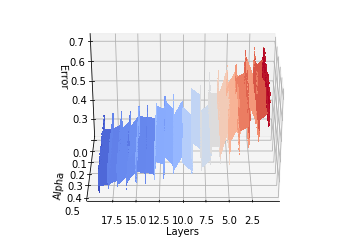

In [11]:
task_e_all_together('logistic')

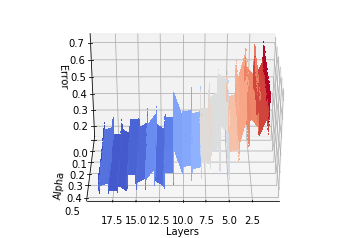

In [12]:
task_e_all_together('tanh')

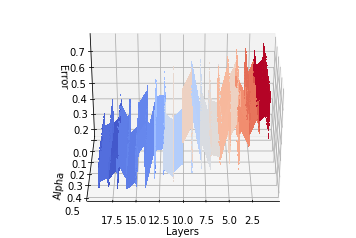

In [13]:
task_e_all_together('relu')

In [53]:
print("\nThe lowest error appears to be when layer size is over 20 and Alpha is in [4, 6].\n 'tanh' seems to perform most consistently.")

print("\nOne such set of parameters - tanh, no. layers: {}, Alpha: {} - results in MSE: {}".format(50, 5, task_e('tanh', 50 , 5)))




The lowest error appears to be when layer size is over 20 and Alpha is in [4, 6].
 'tanh' seems to perform most consistently.

One such set of parameters - tanh, no. layers: 50, Alpha: 5 - results in MSE: 0.022081611570247937


# (f) 

Of the above models, the best appears to be the Neural Network, with an MSE that can go as low as $\approx$ 0.02. However, this may be simply a case of overfitting, as neural nets are prone to this issue. Next is the Random Forest, with an MSE $\approx$ 0.07.  It is also more consistent, arriving at a lower MSE sooner than the other classifiers. It is followed by the Support Vector Classifier $\approx$ 0.09.